# Wellpy Examples

This notebook shows the basic example to create both, Well and WellsGroup for begin different Workflows. This Base classes are intended to be extended by plugs in to add specific functionalities by other libraries. Well logs, Well Forecast etc

In [1]:
import os
path = os.path.abspath(os.path.join('..'))
print(path)
import sys
sys.path.insert(0,path)
print(sys.executable)
import wellpy as wy
import pandas as pd 
import numpy as np

/home/scuervo91/dev/wellpy
/home/scuervo91/anaconda3/envs/reservoir/bin/python


In [2]:
deviations = pd.read_csv('deviations.csv')
deviations.head()

,well,md,inc,azi
0,21103,0.0,0.00,0.00
1,21103,658.0,2.56,267.07
2,21103,781.0,0.88,252.69
3,21103,873.0,1.19,197.57
4,21103,967.0,0.75,174.82


In [3]:
#Create a Well

w3 = wy.Well(
    name='well-3',
    rte=500,
    surf_coord=[1100000,1200000],
    crs=3116,
    survey = deviations[deviations['well']==21103]
    )

<AxesSubplot:>

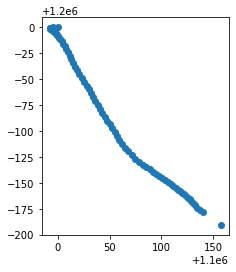

In [4]:
w3.survey.plot()

In [5]:
w3.well_map()

In [6]:
w3.sample_deviation(step=1000)

,new_md,new_inc,new_azi
0,0.0,0.000000,0.000000
1,1000.0,0.640000,175.128710
2,2000.0,0.834086,223.603226
3,3000.0,3.997474,145.800526
4,4000.0,7.805789,153.310211
5,5000.0,8.925789,149.226526
6,6000.0,9.447188,138.330625
7,7000.0,6.925258,126.228866
8,8000.0,4.703469,131.800306
9,9000.0,6.985554,125.570000


In [7]:
w3.sample_position(step=1000)

,new_tvd,new_easting,new_northing,geometry
0,0.000000,1.100000e+06,1.200000e+06,POINT (1100000.000 1200000.000)
1,1000.000000,1.099994e+06,1.199999e+06,POINT (1099994.058 1199998.725)
2,2000.000000,1.099994e+06,1.199999e+06,POINT (1099994.126 1199999.327)
3,3000.000000,1.100002e+06,1.199989e+06,POINT (1100001.801 1199989.214)
4,4000.000000,1.100019e+06,1.199958e+06,POINT (1100018.748 1199958.284)
5,5000.000000,1.100042e+06,1.199918e+06,POINT (1100042.212 1199918.301)
6,6000.000000,1.100069e+06,1.199879e+06,POINT (1100068.726 1199879.426)
7,7000.000000,1.100103e+06,1.199853e+06,POINT (1100103.088 1199852.836)
8,8000.000000,1.100126e+06,1.199835e+06,POINT (1100125.791 1199835.492)
9,9000.000000,1.100150e+06,1.199814e+06,POINT (1100150.177 1199814.255)


In [8]:
w3.to_tvd([2000,3000,4000])

array([1999.575421  , 2998.51371475, 3991.59673708])

In [9]:
w3.to_tvd([2000,3000,6300], subsea=True)

array([-1499.575421  , -2498.51371475, -5764.33400782])

In [10]:
w4 = wy.Well(
    name='well-4',
    rte=500,
    surf_coord=[1140000,1100000],
    crs=3116,
    survey = deviations[deviations['well']==21104]
    )
w5 = wy.Well(
    name='well-5',
    rte=500,
    surf_coord=[1130000,1400000],
    crs=3116,
    survey = deviations[deviations['well']==21105]
    )

In [11]:
wg = wy.WellsGroup([w3,w4,w5])
wg.wells

{'well-3': <wellpy.well.Well at 0x7fd99d6aa9a0>,
 'well-4': <wellpy.well.Well at 0x7fd932924700>,
 'well-5': <wellpy.well.Well at 0x7fd932924550>}

In [12]:
wg.wells_map()

In [13]:
wg.wells_distance()

,well-3,well-4,well-5
well-3,0.000000,107703.296143,202237.484162
well-4,107703.296143,0.000000,300166.620396
well-5,202237.484162,300166.620396,0.000000


In [14]:
wg.wells_surveys(to_crs=3117)

,md,inc,azi,tvd,tvdss,north_offset,east_offset,northing,easting,dleg,geometry,well
0,0.0,0.00,0.00,0.000000,500.000000,0.000000,0.000000,1.200000e+06,1.100000e+06,0.000000,POINT (768056.678 1200385.399),well-3
1,658.0,2.56,267.07,657.781090,-157.781090,-0.751271,-14.678202,1.200000e+06,1.099996e+06,0.389058,POINT (768052.200 1200385.196),well-3
2,781.0,0.88,252.69,780.721708,-280.721708,-1.172742,-18.323367,1.200000e+06,1.099994e+06,1.399586,POINT (768051.088 1200385.074),well-3
3,873.0,1.19,197.57,872.708679,-372.708679,-2.293730,-19.286243,1.199999e+06,1.099994e+06,1.082994,POINT (768050.792 1200384.734),well-3
4,967.0,0.75,174.82,966.695309,-466.695309,-3.836991,-19.525352,1.199999e+06,1.099994e+06,0.613397,POINT (768050.717 1200384.264),well-3
...,...,...,...,...,...,...,...,...,...,...,...,...
68,6460.0,30.30,168.90,5785.589251,-5285.589251,-2619.445308,397.896293,1.399202e+06,1.130121e+06,0.549451,POINT (799516.706 1399464.528),well-5
69,6550.0,29.40,169.40,5863.648400,-5363.648400,-2663.438505,406.330961,1.399188e+06,1.130124e+06,1.037519,POINT (799519.177 1399451.097),well-5
70,6640.0,27.30,167.80,5942.850823,-5442.850823,-2705.327869,414.756703,1.399175e+06,1.130126e+06,2.481161,POINT (799521.651 1399438.306),well-5
71,6733.0,26.10,166.70,6025.933358,-5525.933358,-2746.082756,423.970038,1.399163e+06,1.130129e+06,1.395433,POINT (799524.367 1399425.860),well-5


In [15]:
poly_surveys = wg.wells_surveys_vtk()

In [16]:
poly_surveys.plot(notebook=True)